In [1]:
#import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#to load dataset
df = pd.read_csv("heart.csv")

In [3]:
#display first 5 records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#how many samples
df.shape

(303, 14)

In [5]:
#check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#cross check
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#statistical operation
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#to checl duplicates
df.duplicated().sum()

1

In [10]:
#to remove duplicate value
df.drop_duplicates(inplace=True)

In [11]:
#to checl duplicates
df.duplicated().sum()

0

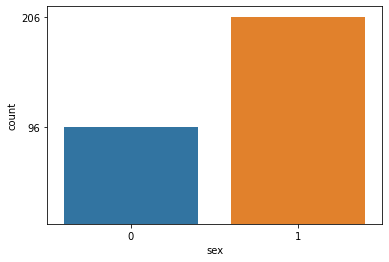

In [12]:
#how many samples are males and females
#male means 1 and female means 0
#sex: discrete means categorical datatype, use countplot()
sb.countplot(data=df,x='sex')
y=df['sex'].value_counts()
plt.yticks(y)
plt.show()

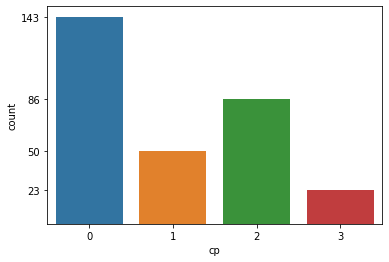

In [13]:
sb.countplot(data=df,x='cp')
y=df['cp'].value_counts()
plt.yticks(y)
plt.show()

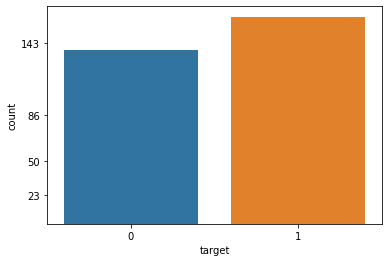

In [14]:
sb.countplot(data=df,x='target')
y=df['cp'].value_counts()
plt.yticks(y)
plt.show()

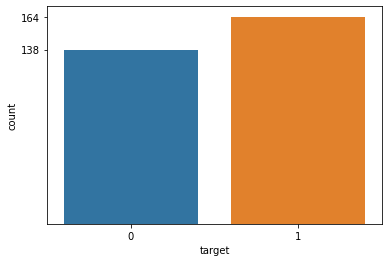

1    164
0    138
Name: target, dtype: int64


In [15]:
#here output variable: target
#how many samples for heart related patient and 
#how many samples for no heart related patiesnts
sb.countplot(data=df,x='target')
y=df['target'].value_counts()
plt.yticks(y)
plt.show()
print(y)

In [16]:
#select input and output
x=df.drop("target",axis=1)  #input
y=df["target"]  #output

In [17]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
x_train.shape,y_train.shape

((211, 13), (211,))

In [19]:
x_test.shape,y_test.shape

((91, 13), (91,))

In [20]:
#apply StandardScaler on x_train and x_test
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [21]:
x_train

array([[-1.06167727, -1.55023411,  1.02938967, ..., -0.69616283,
         0.27995117, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
        -0.72123014,  1.12056846],
       [ 0.43317242, -1.55023411, -0.92737808, ..., -0.69616283,
         1.28113248, -2.14067216],
       ...,
       [-2.66330193,  0.64506386,  0.05100579, ...,  0.95429062,
        -0.72123014, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
         1.28113248,  1.12056846],
       [ 0.00607251,  0.64506386,  1.02938967, ...,  0.95429062,
        -0.72123014,  1.12056846]])

In [22]:
x_test

array([[ 0.64672238,  0.64506386, -0.92737808, ..., -0.69616283,
         1.28113248,  1.12056846],
       [ 0.00607251, -1.55023411,  1.02938967, ..., -0.69616283,
        -0.72123014, -0.51005185],
       [-1.70232713,  0.64506386,  1.02938967, ...,  0.95429062,
         3.2834951 , -0.51005185],
       ...,
       [-0.31425242,  0.64506386,  2.00777354, ...,  0.95429062,
         0.27995117, -0.51005185],
       [-1.06167727,  0.64506386, -0.92737808, ...,  0.95429062,
         0.27995117, -0.51005185],
       [ 1.07382229,  0.64506386, -0.92737808, ..., -0.69616283,
         0.27995117,  1.12056846]])

In [23]:
#create user define function
def create_model(model):
    model.fit(x_train,y_train)   #train the model with 70% data
    y_pred=model.predict(x_test)  #model test with 30% data
    #generate report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
#perform base model means logistic regression

In [26]:
#call inbuilt class LogisticRegression
from sklearn.linear_model import LogisticRegression

In [27]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [28]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[30  8]
 [ 9 44]]


In [29]:
#perform decision tree classifier with gini index

In [30]:
#give dataset in DecisionTreeClassifier algorithm
from sklearn.tree import DecisionTreeClassifier

In [31]:
#create the object of class DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)   #bydefault GINI index

In [32]:
#train the model with 70% data, use fit() 
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [33]:
#call function
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]


In [34]:
#show the information gain of each input(each features)
#inbuilt method feature_important_ of DecisionTreeClassifier class
dict={'input':x.columns,'IG':dtc.feature_importances_}
#convert dict into dataframe
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.317338
1,chol,0.113529
2,ca,0.113295
3,thal,0.088533
4,age,0.085167
5,exang,0.081387
6,thalach,0.073287
7,oldpeak,0.061444
8,trestbps,0.045681
9,sex,0.020339


In [35]:
#apply purining technique(max depth and min sample leaf)

In [36]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with gini index and 
#use parameter max_depth (to remove overfitting)

for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    dtc1=create_model(dtc1)

max depth :  1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
max depth :  2
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        38
           1       0.77      0.68      0.72        53

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91

[[27 11]
 [17 36]]
max depth :  3
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73  

In [37]:
dtc1=DecisionTreeClassifier(random_state=1,max_depth=3) #bydefault gini
#call function 
dtc1=create_model(dtc1)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[26 12]
 [12 41]]


In [38]:
#show the information gain of each input(each features)
#inbuilt method feature_important_ of DecisionTreeClassifier class
dict={'input':x.columns,'IG':dtc1.feature_importances_}
#convert dict into dataframe
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.513685
1,ca,0.159350
2,exang,0.131743
3,oldpeak,0.084076
4,age,0.047148
5,chol,0.041540
6,trestbps,0.022457
7,sex,0.000000
8,fbs,0.000000
9,restecg,0.000000


In [39]:
#use 2nd purning technique : min_samples_leaf inbuilt parameter of 
#DecisionTreeClassifier class, it is class used to remove overfitting
#leaf meand no child
#create object for DesicionTreeClassifier class
for i in range(45,101,1):
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    #by default gini index
    print("min samples leaf: ",i)
    #call function
    dtc2=create_model(dtc2)

min samples leaf:  45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70 

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  81
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  82
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70   

In [40]:
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [41]:
#show the information gain of each input(each features)
#inbuilt method feature_important_ of DecisionTreeClassifier class
dict={'input':x.columns,'IG':dtc2.feature_importances_}
#convert dict into dataframe
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.704874
1,ca,0.218659
2,age,0.076467
3,sex,0.000000
4,trestbps,0.000000
5,chol,0.000000
6,fbs,0.000000
7,restecg,0.000000
8,thalach,0.000000
9,exang,0.000000


In [42]:
#perform decision tree classifier with entropy

In [43]:
#DecisionTreeClassifier with Entropy method
#first create object of DecisionTreeClassifier
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')
#bydeafult criterion='gini' if not given
#formula= -P*log(P)-Q*log(Q )

In [44]:
#call function
dt_entropy=create_model(dt_entropy)

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

[[28 10]
 [16 37]]


In [45]:
#show the information gain of each input(each features)
#inbuilt method feature_important_ of DecisionTreeClassifier class
dict={'input':x.columns,'IG':dt_entropy.feature_importances_}
#convert dict into dataframe
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.243182
1,ca,0.129411
2,age,0.108986
3,thal,0.097910
4,trestbps,0.096058
5,thalach,0.089420
6,chol,0.083485
7,exang,0.077822
8,oldpeak,0.045352
9,sex,0.028375


In [46]:
#apply purining technique(max depth and min sample leaf)

In [47]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with gini index and 
#use parameter max_depth (to remove overfitting)

for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dtc3=DecisionTreeClassifier(random_state=1,max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    dtc3=create_model(dtc3)

max depth :  1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
max depth :  2
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        38
           1       0.77      0.68      0.72        53

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91

[[27 11]
 [17 36]]
max depth :  3
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73  

In [48]:
dtc3=DecisionTreeClassifier(random_state=1,max_depth=3)
dtc3=create_model(dtc3)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[26 12]
 [12 41]]


In [49]:
#show the information gain of each input(each features)
#inbuilt method feature_important_ of DecisionTreeClassifier class
dict={'input':x.columns,'IG':dtc3.feature_importances_}
#convert dict into dataframe
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.513685
1,ca,0.159350
2,exang,0.131743
3,oldpeak,0.084076
4,age,0.047148
5,chol,0.041540
6,trestbps,0.022457
7,sex,0.000000
8,fbs,0.000000
9,restecg,0.000000


In [50]:
#use 2nd purning technique : min_samples_leaf inbuilt parameter of 
#DecisionTreeClassifier class, it is class used to remove overfitting
#leaf meand no child
#create object for DesicionTreeClassifier class
for i in range(45,101,1):
    dtc4=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    #by default gini index
    print("min samples leaf: ",i)
    #call function
    dtc4=create_model(dtc4)

min samples leaf:  45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70 

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  80
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
min samples leaf:  81
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70   

In [51]:
dtc4=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dtc4=create_model(dtc4)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [52]:
#apply random forest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
#create the object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=10,random_state=1)
#here n_estimators means take how many no. of decision tree
#n_estimators >=10 but n_estimators<=100

In [55]:
#call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        38
           1       0.80      0.66      0.72        53

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.72      0.70      0.71        91

[[29  9]
 [18 35]]


In [56]:
for i in range(10,101,1):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print("No. of Decision Tree: ",i)
    #call function
    rfc=create_model(rfc)

No. of Decision Tree:  10
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        38
           1       0.80      0.66      0.72        53

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.72      0.70      0.71        91

[[29  9]
 [18 35]]
No. of Decision Tree:  11
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[28 10]
 [13 40]]
No. of Decision Tree:  12
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No. of Decision Tree:  34
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No. of Decision Tree:  35
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74     

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        38
           1       0.83      0.74      0.78        53

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

[[30  8]
 [14 39]]
No. of Decision Tree:  57
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
No. of Decision Tree:  58
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        38
           1       0.83      0.72      0.77        53

    accuracy                           0.75        91
   macro avg       0.75      0.75     

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
No. of Decision Tree:  80
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
No. of Decision Tree:  81
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77     

In [57]:
rfc=RandomForestClassifier(n_estimators=25,random_state=1)
#by default gini index
#call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[28 10]
 [12 41]]


In [58]:
dict={'input':x.columns,'IG':rfc.feature_importances_}
#convert dict into dataframe
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.190503
1,thalach,0.155793
2,thal,0.104839
3,oldpeak,0.092591
4,ca,0.076090
5,age,0.071090
6,trestbps,0.067548
7,slope,0.062051
8,chol,0.058885
9,exang,0.052457


In [59]:
#use purning technique 
#max-depth
for i in range(1,9): #start=1 stop=9-1=8 step=+1
    rfc1=RandomForestClassifier(n_estimators=25,random_state=1,max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    rfc1=create_model(rfc1)

max depth :  1
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]
max depth :  2
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]
max depth :  3
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74  

In [60]:
rfc1=RandomForestClassifier(n_estimators=25,random_state=1,max_depth=2)
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]


In [61]:
dict={'input':x.columns,'IG':rfc1.feature_importances_}
#convert dict into dataframe
df4=pd.DataFrame(dict)
df4.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.240697
1,thalach,0.178520
2,thal,0.158538
3,oldpeak,0.105390
4,slope,0.098428
5,exang,0.082175
6,ca,0.073648
7,sex,0.024933
8,age,0.023987
9,chol,0.009222


In [62]:
for i in range(45,101,1):
    rfc2=RandomForestClassifier(n_estimators=25,random_state=1,min_samples_leaf=i) #bydefault gini
    print("min sample value : ",i)
    #call function 
    rfc2=create_model(rfc2)
    

min sample value :  45
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

[[29  9]
 [11 42]]
min sample value :  46
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

[[29  9]
 [11 42]]
min sample value :  47
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   macro avg       0.

              precision    recall  f1-score   support

           0       0.66      0.50      0.57        38
           1       0.69      0.81      0.75        53

    accuracy                           0.68        91
   macro avg       0.67      0.66      0.66        91
weighted avg       0.68      0.68      0.67        91

[[19 19]
 [10 43]]
min sample value :  69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
min sample value :  70
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
min sample value :  93
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
min sample value :  94
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37 

# ADA Boosting

In [63]:
#apply ensembling technique boosting
#1. first apply ADA boost: call inbuilt class AdaBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier

In [64]:
x.shape

(302, 13)

In [65]:
for i in range(1,14):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No. of Decision stump: ",i)
    #call function
    ada=create_model(ada)

No. of Decision stump:  1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
No. of Decision stump:  2
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        38
           1       0.88      0.55      0.67        53

    accuracy                           0.69        91
   macro avg       0.73      0.72      0.69        91
weighted avg       0.76      0.69      0.69        91

[[34  4]
 [24 29]]
No. of Decision stump:  3
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   macro avg

In [66]:
#create the object of AdaBoostClassifier class
#ADA Boost creates decision stump (means one root node and 2 leaf node)
#leaf node: no any childs
ada=AdaBoostClassifier(n_estimators=6,random_state=1)
#n_estimators means how many decision stumps, decision stumps depend on 
#no. of input
#in case of our dataset, no. of features means inputs=13
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.80      0.81      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[27 11]
 [10 43]]


In [67]:
dict={'input':x.columns,'IG':ada.feature_importances_}
#convert dict into dataframe
df=pd.DataFrame(dict)
df.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,sex,0.166667
1,cp,0.166667
2,thalach,0.166667
3,oldpeak,0.166667
4,slope,0.166667
5,ca,0.166667
6,age,0.000000
7,trestbps,0.000000
8,chol,0.000000
9,fbs,0.000000


# Gradient Boosting

In [68]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling 
#technique 
# GB  : - its create a fully grown tree.this algorithm is focus on 
#short comings 
#short comings means error

In [69]:
#call inbuilt class for Gradient Boosting: GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
#Create the object of GradientBoostingClassifier class  and passing the 
#parameter n_estimators means how many iteration means how many
#decisionTree use for train the model

for i in range(10,101,1):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of estimators: ",i)
    #call function
    gbc=create_model(gbc)


No of estimators:  10
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]
No of estimators:  11
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]
No of estimators:  12
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75 

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
No of estimators:  35
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
No of estimators:  36
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74   

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

[[28 10]
 [16 37]]
No of estimators:  59
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

[[28 10]
 [16 37]]
No of estimators:  60
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71   

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
No of estimators:  82
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
No of estimators:  83
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71   

In [71]:
#Create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=11,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]


In [72]:
dict={'input':x.columns,'IG':gbc.feature_importances_}
#convert dict into dataframe
df=pd.DataFrame(dict)
df.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.428971
1,ca,0.151844
2,thalach,0.085778
3,exang,0.077987
4,thal,0.065412
5,oldpeak,0.064054
6,sex,0.042441
7,age,0.030353
8,trestbps,0.020001
9,slope,0.019248


# Extreme Gradient Boosting(XGB) 

In [73]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [74]:
#first time install xgboost on system
#!pip install xgboost
!pip install xgboost

In [75]:
#call inbuilt class:XGBClassifier which definbe in package xgboost
from xgboost import XGBClassifier

In [76]:
for i in range(10,101,1):
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("No of estimators: ",i)
    #call function
    xgc=create_model(xgc)


No of estimators:  10
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]
No of estimators:  11
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
No of estimators:  12
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74 

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No of estimators:  36
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No of estimators:  37
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73   

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of estimators:  61
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of estimators:  62
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72   


[[27 11]
 [14 39]]
No of estimators:  86
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of estimators:  87
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of estimators:  88
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   m

In [77]:
#create object of XGBClassifier class
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#reg means regularisation
#alpha means lambda means hyper parameter
#if reg_alpha=1, 1 means True means automatic handle outlier and overfitting
#call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]


In [78]:
dict={'input':x.columns,'IG':xgc.feature_importances_}
#convert dict into dataframe
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.454883
1,exang,0.111569
2,ca,0.097874
3,thal,0.074755
4,oldpeak,0.054751
5,slope,0.053498
6,thalach,0.044574
7,sex,0.028306
8,trestbps,0.024244
9,restecg,0.019358


In [79]:
dict={'input':x.columns,'IG':gbc.feature_importances_}
#convert dict into dataframe
df=pd.DataFrame(dict)
df.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.428971
1,ca,0.151844
2,thalach,0.085778
3,exang,0.077987
4,thal,0.065412
5,oldpeak,0.064054
6,sex,0.042441
7,age,0.030353
8,trestbps,0.020001
9,slope,0.019248


In [80]:
#give data in support vector machine
#1. Linear kernal function of svm: 
#means suppose data are linear separatable with the help of straight line
#call inbuilt class for linear svm: LinearSVC
#SVC means support vector classifier
from sklearn.svm import LinearSVC

In [81]:
#create object of LinearSVC class
svc=LinearSVC(random_state=1)  #no add nay error means suppose no outlier
#in iur dataset means it is hard margin

In [82]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [83]:
#apply KNN algorithm: inbuilt class KNeighborsClassifier which define in 
#outer class neighbors and outer class define in package sklearn
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [85]:
#call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.84      0.81      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[30  8]
 [10 43]]


In [86]:
#Apply Naive Bayes Theorem
from sklearn.naive_bayes import GaussianNB
#inbuilt class GaussianNB

In [87]:
#craete object of GaussianNB class
gnb=GaussianNB()

In [88]:
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.85      0.77      0.81        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91

[[31  7]
 [12 41]]


In [ ]:
#conclusion: In this dataset their are Support vector machine (SVC) this algorithm is predict 80% accuracy